In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

figw=10
figh=4

In [2]:
data_mori = pd.read_csv('data/mori_groups.csv')   #load Mori 2021 proteomics with assigned sectors (see the other notebook)
legend_mori = pd.read_excel('data/mori_legend.xlsx', sheet_name = 'EV3-Samples-2')
legend_mori['Group'] = legend_mori['Group'].fillna(method='ffill')
legend_mori=legend_mori.iloc()[:,:3]

c_filter=['Gene name', 'Gene locus', 'Protein ID', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'D6', 'D7', 'D8', 'F4', 'F5', 'F6', 'F7', 'F8']
a_filter=['Gene name', 'Gene locus', 'Protein ID', 'D1','D2','D3','D4','D5','F2','F3']
r_filter=['Gene name', 'Gene locus', 'Protein ID', 'A2', 'H1','H5','E1','E2','E3','E4']


legendc = legend_mori[legend_mori['Group'] == 'C-limitation']
legenda = legend_mori[legend_mori['Group'] == 'A-limitation']
legendr = legend_mori[legend_mori['Group'] == 'R-limitation']

moric=data_mori[c_filter]
moria=data_mori[a_filter]
morir=data_mori[r_filter]

ccols = moric.loc[:, 'C2':'F8'].columns
acols = moria.loc[:, 'D1':'F3'].columns
rcols = morir.loc[:, 'A2':'E4'].columns

**We provide mori proteomisc with protein already assigned to sectors, you dont need the code below**

In [3]:
# moric=data_mori[c_filter]
# moria=data_mori[a_filter]
# morir=data_mori[r_filter]
# moric.insert(loc=18,column='intercept', value=None)
# moric.insert(loc=19,column='slope', value=None)
# moria.insert(loc=10,column='intercept', value=None)
# moria.insert(loc=11,column='slope', value=None)
# morir.insert(loc=10,column='intercept', value=None)
# morir.insert(loc=11,column='slope', value=None)

# data_mori.insert(loc=39,column='Ctrend', value=None)
# data_mori.insert(loc=40,column='Atrend', value=None)
# data_mori.insert(loc=41,column='Rtrend', value=None)

In [4]:
# ID_index = moric.columns.get_loc('Protein ID')
# ccols = moric.loc[:, 'C2':'F8'].columns
# acols = moria.loc[:, 'D1':'F3'].columns
# rcols = morir.loc[:, 'A2':'E4'].columns
# for name in moric['Gene name']:
#     sector_regression = LinearRegression()
#     fractions= moric.loc[moric['Gene name'] == name, ccols]
#     gr=legendc['Growth rate (1/h)']
#     fractions=fractions.values
#     gr=gr.values
#     gr=gr.reshape(-1,1)
#     fractions=fractions.reshape(-1,1)
#     sector_regression.fit(gr,fractions)
#     m=sector_regression.coef_[0][0]
#     q=sector_regression.intercept_[0]
#     moric.loc[moric['Gene name'] == name,'slope']=m
#     moric.loc[moric['Gene name'] == name,'intercept']=q
#     if(m>0):
#         data_mori.loc[data_mori['Gene name']==name, 'Ctrend']='down'
#     if(m<0):
#         data_mori.loc[data_mori['Gene name']==name, 'Ctrend']='up'
# #     if(m==0):
# #         data_mori.loc[data_mori['Gene name']==name, 'Ctrend']='0'
# for name in moria['Gene name']:
#     sector_regression = LinearRegression()
#     fractions= moria.loc[moria['Gene name'] == name, acols]
#     gr=legenda['Growth rate (1/h)']
#     fractions=fractions.values
#     fractions=fractions.reshape(-1,1)
#     gr=gr.values
#     gr =gr.reshape(-1,1)
#     sector_regression.fit(gr,fractions)
#     m=sector_regression.coef_[0][0]
#     q=sector_regression.intercept_[0]
#     moria.loc[moria['Gene name'] == name,'slope']=m
#     moria.loc[moria['Gene name'] == name,'intercept']=q
#     if(m>0):
#         data_mori.loc[data_mori['Gene name']==name, 'Atrend']='down'
#     if(m<0):
#         data_mori.loc[data_mori['Gene name']==name, 'Atrend']='up'
# #     if(m==0):
# #         data_mori.loc[data_mori['Gene name']==name, 'Atrend']='0'
# for name in morir['Gene name']:
#     sector_regression = LinearRegression()
#     fractions= morir.loc[morir['Gene name'] == name, rcols]
#     gr=legendr['Growth rate (1/h)']
#     fractions=fractions.values
#     gr=gr.values
#     fractions=fractions.reshape(-1,1)
#     gr= gr.reshape(-1,1)
#     sector_regression.fit(gr,fractions)
#     m=sector_regression.coef_[0][0]
#     q=sector_regression.intercept_[0]
#     morir.loc[morir['Gene name'] == name,'slope']=m
#     morir.loc[morir['Gene name'] == name,'intercept']=q
#     if(m>0):
#         data_mori.loc[data_mori['Gene name']==name, 'Rtrend']='down'
#     if(m<0):
#         data_mori.loc[data_mori['Gene name']==name, 'Rtrend']='up'
# #     if(m==0):
# #         data_mori.loc[data_mori['Gene name']==name, 'Rtrend']='0'

In [5]:
# def classify_group(row):
#     trend_combination = (row['Ctrend'], row['Atrend'], row['Rtrend'])

#     if trend_combination == ('up', 'up', 'up'):
#         return "S'"
#     elif trend_combination == ('up', 'up', 'down'):
#         return 'S'
#     elif trend_combination == ('up', 'down', 'up'):
#         return "C'"
#     elif trend_combination == ('up', 'down', 'down'):
#         return 'C'
#     elif trend_combination == ('down', 'up', 'up'):
#         return "A'"
#     elif trend_combination == ('down', 'up', 'down'):
#         return 'A'
#     elif trend_combination == ('down', 'down', 'up'):
#         return 'R'
#     elif trend_combination == ('down', 'down', 'down'):
#         return 'U'
#     else:
#         return 'Unknown Group'
# data_mori['group'] = data_mori.apply(classify_group, axis=1)

# data_mori.to_csv('mori_groups.csv', index=False)

In [6]:
#restricted version of the R sector:only ribosomal proteins (file downloaded from Dai 2016)
dai=pd.read_excel('data/41564_2017_BFnmicrobiol2016231_MOESM55_ESM.xlsx', sheet_name=1, header=1)
names=dai['r-protein']
Rstc_mori=moric[moric['Gene name'].isin(names)]

In [7]:
zhu_rich=pd.read_excel('data/41467_2023_36254_MOESM3_ESM.xlsx', 3)  #proteomics from zhu et al 2023
zhu_poor=pd.read_excel('data/mmc3.xlsx')   #proteomics from zhu et al 2024

In [8]:
zhu_poor.insert(loc=12,column='Mori sector', value=None)
zhu_rich.insert(loc=12,column='Mori sector', value=None)


zhu_poor.insert(loc=13,column='wt_mass_fraction_poor', value=None)
zhu_rich.insert(loc=13,column='wt_mass_fraction_rich', value=None)

zhu_poor.insert(loc=14,column='rela_mass_fraction_poor', value=None)
zhu_rich.insert(loc=14,column='rela_mass_fraction_rich', value=None)

### Assign mori sectors to genes in zhu et al proteomics

In [9]:
# #assign Mori sectors for the first time in zhu 2023 and zhu 2024 proteomics
# #according to Mori
# for index, row in zhu_rich.iterrows():
#     found_match = False
#     for _, row1 in data_mori.iterrows():
#         if str(row1['Protein ID']) in row['Majority protein IDs']:
#             zhu_rich.at[index, 'Mori sector'] = row1['group']
#             found_match = True
#             break
    
#     if not found_match:
#         zhu_rich.at[index, 'Mori sector'] = 'Unknown'
# zhu_rich.to_csv('data/proteomics_zhu_rich.txt', sep=',', index=False) 

# for index, row in zhu_poor.iterrows():
#     found_match = False
#     for _, row1 in data_mori.iterrows():
#         if str(row1['Protein ID']) in row['Majority protein IDs']:
#             zhu_poor.at[index, 'Mori sector'] = row1['group']
#             found_match = True
#             break
    
#     if not found_match:
#         zhu_poor.at[index, 'Mori sector'] = 'Unknown'
# zhu_poor.to_csv('data/proteomics_zhu_poor.txt', sep=',', index=False)

### It's easier and faster to get Mori sectors from the precompiled file we provide

In [10]:
updated=pd.read_csv('data/proteomics_zhu_rich.txt', sep=',')          #relA overexpression in glucose medium with amino acids
for index, row in zhu_rich.iterrows():
    zhu_rich.at[index, 'Mori sector'] = updated.at[index,'Mori sector']

updated=pd.read_csv('data/proteomics_zhu_poor.txt', sep=',')          #relA overexpression in glucose medium without amino acids
for index, row in zhu_poor.iterrows():
    zhu_poor.at[index, 'Mori sector'] = updated.at[index,'Mori sector']

### Compute mean and standard deviations of mass fractions in zhu et al proteomics

In [11]:
totalpoor1=sum(zhu_poor['iBAQ mass W_glu_1'])
totalpoor2=sum(zhu_poor['iBAQ mass W_glu_2'])
totalpoor1star=sum(zhu_poor['iBAQ mass PLAS30_1'])
totalpoor2star=sum(zhu_poor['iBAQ mass PLAS30_2'])

totalrich1=sum(zhu_rich['iBAQ mass E1'])
totalrich2=sum(zhu_rich['iBAQ mass E2'])
totalrich1star=sum(zhu_rich['iBAQ mass E3'])
totalrich2star=sum(zhu_rich['iBAQ mass E4'])


zhu_poor['wt_mass_fraction_poor'] = 1/2*(zhu_poor['iBAQ mass W_glu_1']/totalpoor1+zhu_poor['iBAQ mass W_glu_2']/totalpoor2)
zhu_poor['rela_mass_fraction_poor'] = 1/2*(zhu_poor['iBAQ mass PLAS30_1']/totalpoor1star+zhu_poor['iBAQ mass PLAS30_2']/totalpoor2star)
zhu_rich['wt_mass_fraction_rich'] = 1/2*(zhu_rich['iBAQ mass E1']/totalrich1+zhu_rich['iBAQ mass E2']/totalrich2)
zhu_rich['rela_mass_fraction_rich'] = 1/2*(zhu_rich['iBAQ mass E3']/totalrich1star+zhu_rich['iBAQ mass E4']/totalrich2star)

zhu_poor['wt_mass_fraction_poor_err'] = np.std([
    zhu_poor['iBAQ mass W_glu_1']/totalpoor1, 
    zhu_poor['iBAQ mass W_glu_2']/totalpoor2], axis=0)

zhu_poor['rela_mass_fraction_poor_err'] = np.std([
    zhu_poor['iBAQ mass PLAS30_1']/totalpoor1star, 
    zhu_poor['iBAQ mass PLAS30_2']/totalpoor2star], axis=0)

zhu_rich['wt_mass_fraction_rich_err'] = np.std([
    zhu_rich['iBAQ mass E1']/totalrich1, 
    zhu_rich['iBAQ mass E2']/totalrich2], axis=0)

zhu_rich['rela_mass_fraction_rich_err'] = np.std([
    zhu_rich['iBAQ mass E3']/totalrich1star, 
    zhu_rich['iBAQ mass E4']/totalrich2star], axis=0)

In [12]:
# Merge the datasets on 'gene name' using an inner join
merged_zhu = pd.merge(zhu_poor, zhu_rich, on='Gene names')

# Filter for relevant columns (keep 'gene name' and 'sector' from both datasets)
columns_to_keep = ['Gene names', 'Mori sector_x', 'wt_mass_fraction_poor', 'wt_mass_fraction_rich', 'rela_mass_fraction_poor', 'rela_mass_fraction_rich', 'wt_mass_fraction_poor_err', 'wt_mass_fraction_rich_err', 'rela_mass_fraction_poor_err', 'rela_mass_fraction_rich_err']  # Adjust based on your dataset
merged_zhu = merged_zhu[columns_to_keep]
merged_zhu=merged_zhu.rename(columns={'Mori sector_x':'Mori sector'})
# Save the result to a new file
merged_zhu.to_csv('data/merged_zhu_proteomics.csv', index=False)


In [13]:
Rstc=merged_zhu[merged_zhu['Gene names'].isin(names)]

In [14]:
growth_rates=[0.95, 1.25, 0.45, 0.6]  #growth rates in zhu et al proteomics:
                                      #wt_poor, wt_rich, rela_oe_poor, rela_oe_rich

In [15]:
#find total mass fraction of ribosomal proteins in each condition
columns_to_sum = Rstc.loc[:,['wt_mass_fraction_poor', 'wt_mass_fraction_rich', 'rela_mass_fraction_poor', 'rela_mass_fraction_rich', 'wt_mass_fraction_poor_err', 'wt_mass_fraction_rich_err', 'rela_mass_fraction_poor_err', 'rela_mass_fraction_rich_err']]
sumRstc=columns_to_sum.sum()
sumRstc

wt_mass_fraction_poor          0.135326
wt_mass_fraction_rich          0.163142
rela_mass_fraction_poor        0.099087
rela_mass_fraction_rich        0.104331
wt_mass_fraction_poor_err      0.002713
wt_mass_fraction_rich_err      0.004631
rela_mass_fraction_poor_err    0.002884
rela_mass_fraction_rich_err    0.002279
dtype: float64

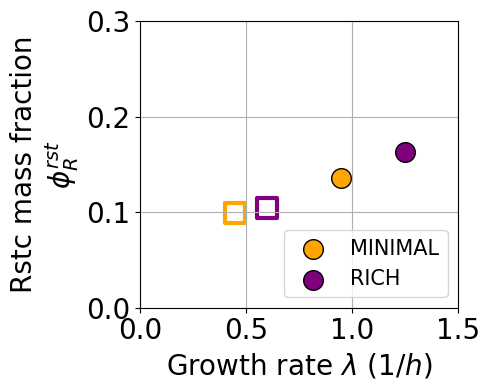

In [16]:
fig=plt.figure(figsize=(figw/2,figh))
plt.scatter(growth_rates[0], sumRstc[0], color= 'orange', edgecolor='black', s=200, linewidth=1, label='MINIMAL')
plt.scatter(growth_rates[1], sumRstc[1], color= 'purple', edgecolor='black', s=200, linewidth=1, label='RICH')
plt.scatter(growth_rates[2], sumRstc[2], color= 'white', marker='s', edgecolor='orange', s=200, linewidth=3)
plt.scatter(growth_rates[3], sumRstc[3], color= 'white', marker='s', edgecolor='purple', s=200, linewidth=3)
plt.ylabel('Rstc mass fraction\n' r'$\phi_R^{rst}$', fontsize=20)
plt.xlabel('Growth rate ' r'$\lambda\ (1/h)$', fontsize=20)
plt.xlim(0,1.5)
plt.ylim(0.0,0.3)
plt.tick_params(axis='both', which='both', labelsize=20)
plt.legend(fontsize=15, loc='lower right')
plt.tight_layout()
plt.grid()
plt.show()

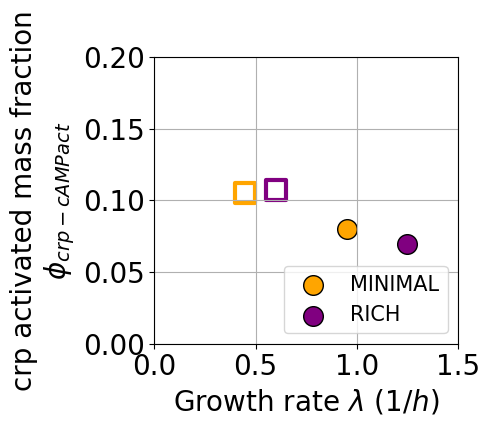

In [17]:
crp_targets=pd.read_csv('data/crp_regulatees.csv')  #downloaded from ecocyc
crp_targets=crp_targets.drop_duplicates(keep='first')
crp_activated=crp_targets.loc[crp_targets['Sign']=='+']
crp_repressed=crp_targets.loc[crp_targets['Sign']=='-']

# # # Eliminate those common genes from both crp_activated and crp_repressed
temp=crp_activated
crp_activated = crp_activated[~crp_activated['Gene'].isin(crp_repressed['Gene'])]
crp_repressed = crp_repressed[~crp_repressed['Gene'].isin(temp['Gene'])]

#find cAMP-Crp activated genes in zhu et al. proteomics
camp_activated_rst = data_mori.loc[(data_mori['Gene name'].isin(crp_activated['Gene'])) & (data_mori['Ctrend']=='up')]
zhu_crp_act = merged_zhu.loc[(merged_zhu['Gene names'].isin(crp_activated['Gene']))&(merged_zhu['Gene names'].isin(camp_activated_rst['Gene name']))]
# the above filters out cAMP activated genes that are downregulated under climitation, for which cAMP cannot be considered the main regulator

columns_to_sum = zhu_crp_act.loc[:,['wt_mass_fraction_poor', 'wt_mass_fraction_rich', 'rela_mass_fraction_poor', 'rela_mass_fraction_rich', 'wt_mass_fraction_poor_err', 'wt_mass_fraction_rich_err', 'rela_mass_fraction_poor_err', 'rela_mass_fraction_rich_err']]
sumcrp=columns_to_sum.sum()
sumcrp
fig=plt.figure(figsize=(figw/2,figh))
plt.scatter(growth_rates[0], sumcrp[0], color= 'orange', edgecolor='black', s=200, linewidth=1, label='MINIMAL')
plt.scatter(growth_rates[1], sumcrp[1], color= 'purple', edgecolor='black', s=200, linewidth=1, label='RICH')
plt.scatter(growth_rates[2], sumcrp[2], color= 'white', marker='s', edgecolor='orange', s=200, linewidth=3)
plt.scatter(growth_rates[3], sumcrp[3], color= 'white', marker='s', edgecolor='purple', s=200, linewidth=3)


plt.ylabel('crp activated mass fraction\n' r'$\phi_{crp-cAMP act}$', fontsize=20)
plt.xlabel('Growth rate ' r'$\lambda\ (1/h)$', fontsize=20)
plt.xlim(0,1.5)
plt.ylim(0.0,0.2)
plt.tick_params(axis='both', which='both', labelsize=20)
plt.legend(fontsize=15, loc='lower right')
plt.tight_layout()
plt.grid()
plt.show()


### cAMP-activated proteins are upregulated under rela overexpression, consistent with our model

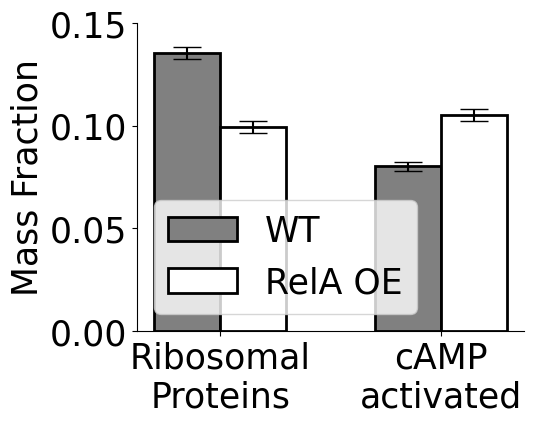

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["Ribosomal\nProteins", "cAMP\nactivated"] 

wt_values = [sumRstc[0], sumcrp[0]]  #index 0: wt poor
mutant_values = [sumRstc[2], sumcrp[2]]  #index 2: rela oe poor

x = np.arange(len(categories))  # X locations for groups
width = 0.3# Width of bars

# Create figure and axis

# Plot bars for WT and Mutants
fig, ax=plt.subplots(figsize=(figw/2, figh))
ax.bar(x - width/2, wt_values, width, yerr=[sumRstc[4], sumcrp[4]], color="grey", label='WT', edgecolor="black", linewidth=2, capsize=10)
ax.bar(x + width/2, mutant_values, width, yerr=[sumRstc[6], sumcrp[6]], color="white", label='RelA OE', edgecolor="black", linewidth=2, capsize=10)

# Labels and title
ax.set_ylabel("Mass Fraction", fontsize=25)
ax.set_xticks(x)
ax.tick_params(labelsize=25)
ax.set_yticks([0,0.05,0.1,0.15])
ax.set_xticklabels(categories, fontsize=25)
ax.legend(fontsize=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
# plt.savefig('images/barplot_zhu.svg')
plt.show()

***Plot with data from Zhu2024, to show that cAMP activated proteins are upregulated even in presence of the stress response***